In [1]:
# Machine Learning Course Project: 11/24/2018:

# Lets import the necessary libraries first:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn

In [18]:
data=pd.read_csv("data/wine/winequality-red.csv", sep=";")

In [21]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
data.shape

(1599, 12)

In [24]:
# No data cleaning is required


In [25]:
X1=data.copy()

In [26]:
X1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
X1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
X = X1.drop(columns="quality")

In [30]:
Y=data["quality"]
Y = 

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [32]:
# Lets do the AdaBoost Classifier Grid Search:

# Start by creating a simple AdaBoost Classifier only by using default parameters:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),random_state=42)

In [34]:
ada_clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42)

In [35]:
ada_clf.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42)

In [36]:
# a) AdaBoost Classifier along with GridSearchCV tool:
# n_estimators: 100, 200, 300, 400
# learning_rate: 0.2,0.4,0.6,0.8,1,1.2

from sklearn.model_selection import GridSearchCV

#create a dictionary of parameters

param_grid = {
'n_estimators' : [100,200,300,400],
'learning_rate': [0.2,0.4,0.6,0.8,1,1.2]}

# Create a AdaBoost Classifier:

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),random_state=42)


In [47]:
# Create gridsearch object with various combinations of parameters:

ada_Grid = GridSearchCV(ada_clf, param_grid, cv = 5, refit=True, n_jobs=-1, verbose = 1)

In [48]:
# Lets fit the model:
ada_Grid.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400], 'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [49]:
# b) Use the best estimator from GridSearchCV to predict on test data.Use the.predict_proba()
# and the .predict() methods to get predicted probabilities as well as predicted classes.

Y_pred_ada = ada_Grid.predict(X_test)

In [54]:
# limit to probability for class = 1

base_probs = ada_Grid.predict_proba(X_test)[:,1]

In [55]:
sklearn.metrics.confusion_matrix(Y_test, Y_pred_ada)

array([[ 0,  1,  0,  0,  0,  0],
       [ 1,  0,  7,  3,  1,  0],
       [ 1,  1, 84, 38,  4,  6],
       [ 1,  0, 46, 56, 20,  8],
       [ 0,  0,  6, 10, 22,  3],
       [ 0,  0,  0,  0,  1,  0]])

In [59]:
(Y_pred_ada == Y_test).mean()

0.50625

Feature ranking:
1. feature 10 (0.320000)
2. feature 9 (0.310000)
3. feature 8 (0.290000)
4. feature 4 (0.030000)
5. feature 1 (0.030000)
6. feature 6 (0.010000)
7. feature 0 (0.010000)
8. feature 7 (0.000000)
9. feature 5 (0.000000)
10. feature 3 (0.000000)
11. feature 2 (0.000000)


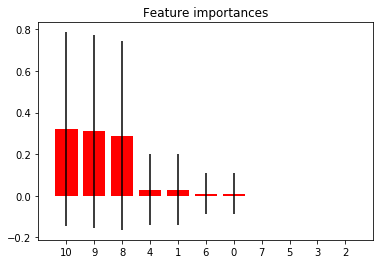

In [53]:
# Doing the feature importance plot:

# e) Identify the top 5 features.Feel free to print a list OR to make a plot.

## start by pulling out the total features: 

importances = ada_Grid.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in ada_Grid.best_estimator_.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking:

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the AdaBoostClassifier:

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
# So, the top 5 features from this feature importance plot are:



In [ ]:
# Since this is a regressor and not a classifier, we cannot construct confusion matrix and classification report

